<a href="https://colab.research.google.com/github/TahirRaheem/Monte-Carlo-Tahir/blob/main/Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of tasks in the project: 3

Task 1
Enter mean cost for Task 1: 500
Enter standard deviation for cost for Task 1: 50
Enter mean duration for Task 1 (days): 2
Enter standard deviation for duration for Task 1 (days): 1

Task 2
Enter mean cost for Task 2: 1000
Enter standard deviation for cost for Task 2: 100
Enter mean duration for Task 2 (days): 10
Enter standard deviation for duration for Task 2 (days): 5

Task 3
Enter mean cost for Task 3: 1500
Enter standard deviation for cost for Task 3: 150
Enter mean duration for Task 3 (days): 15
Enter standard deviation for duration for Task 3 (days): 5


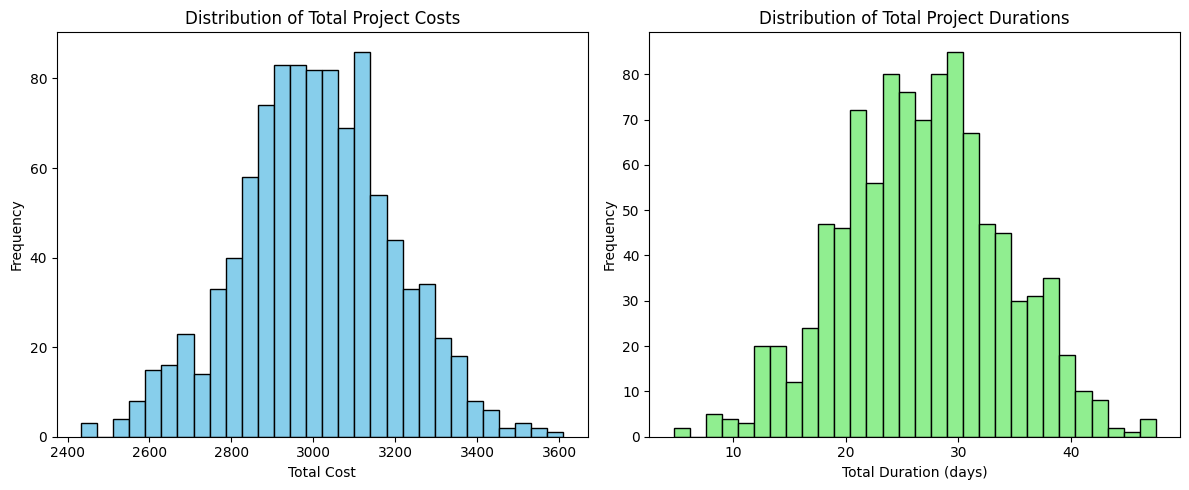

Estimated Project Cost (Mean): 3005.10
Estimated Project Duration (Mean): 26.81 days
Cost 95% Confidence Interval: [2619.21278697 3364.92662738]
Duration 95% Confidence Interval: [12.92298263 40.41697464]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
num_simulations = 1000

# Ask user to input the number of tasks
num_tasks = int(input("Enter the number of tasks in the project: "))

# Create an empty list to store the task data
tasks = []

# Gather user input for each task's cost and duration
for i in range(num_tasks):
    print(f"\nTask {i + 1}")

    # Collect mean and standard deviation for cost
    mean_cost = float(input(f"Enter mean cost for Task {i + 1}: "))
    std_cost = float(input(f"Enter standard deviation for cost for Task {i + 1}: "))

    # Collect mean and standard deviation for duration
    mean_duration = float(input(f"Enter mean duration for Task {i + 1} (days): "))
    std_duration = float(input(f"Enter standard deviation for duration for Task {i + 1} (days): "))

    # Append the task data (mean_cost, std_cost, mean_duration, std_duration) to tasks list
    tasks.append((mean_cost, std_cost, mean_duration, std_duration))

# Arrays to store the total cost and duration from each simulation
total_costs = np.zeros(num_simulations)
total_durations = np.zeros(num_simulations)

# Monte Carlo simulation
for i in range(num_simulations):
    total_cost = 0
    total_duration = 0

    # Simulate each task's cost and duration
    for task in tasks:
        mean_cost, std_cost, mean_duration, std_duration = task

        # Sample from normal distribution for cost and duration
        simulated_cost = np.random.normal(mean_cost, std_cost)
        simulated_duration = np.random.normal(mean_duration, std_duration)

        # Accumulate total cost and duration
        total_cost += simulated_cost
        total_duration += simulated_duration

    # Store the total cost and duration for this simulation
    total_costs[i] = total_cost
    total_durations[i] = total_duration

# Plot histograms of total costs and durations
plt.figure(figsize=(12, 5))

# Total cost histogram
plt.subplot(1, 2, 1)
plt.hist(total_costs, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Project Costs')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')

# Total duration histogram
plt.subplot(1, 2, 2)
plt.hist(total_durations, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Project Durations')
plt.xlabel('Total Duration (days)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate and display summary statistics
print(f"Estimated Project Cost (Mean): {np.mean(total_costs):.2f}")
print(f"Estimated Project Duration (Mean): {np.mean(total_durations):.2f} days")
print(f"Cost 95% Confidence Interval: {np.percentile(total_costs, [2.5, 97.5])}")
print(f"Duration 95% Confidence Interval: {np.percentile(total_durations, [2.5, 97.5])}")
